## 1\. 계층적 클러스터링 (Hierarchical Clustering)

  - **K-Means의 한계**: 분석가가 사전에 군집(Cluster)의 개수, 즉 'k'값을 정해야 함. 하지만 실제 비즈니스 현장에서는 최적의 그룹 수를 미리 알기 어려움.
  - **`계층적 클러스터링(Hierarchical Clustering)`**: 군집의 수를 미리 정하지 않고, 가장 유사한 데이터부터 순차적으로 묶어나가며 전체 데이터가 하나의 거대한 그룹이 될 때까지의 \*\*'과정'\*\*을 모두 보여주는 기법.
  - **장점**: 분석가는 \*\*'덴드로그램(Dendrogram)'\*\*을 보고 마치 나무의 큰 가지를 잘라내듯, 가장 적절한 지점에서 군집을 나누어 최적의 그룹 수를 유연하게 결정할 수 있음.

-----

## 핵심 원리 파헤치기 (Deep Dive)

  - **기본 원리**: 개별 데이터를 하나의 작은 클러스터로 보고, 두 클러스터 사이의 거리가 가까운 순서대로 묶어 나가는 과정을 모든 데이터가 하나의 거대 클러스터가 될 때까지 반복함.

  - **'가문 족보 만들기' 비유**:

      - 모든 사람이 개별적으로 존재함 (개별 데이터 포인트).
      - 가장 가까운 '형제'끼리 묶고 (첫 클러스터), 다음으로 '사촌' 그룹을 묶는 과정을 반복.
      - 결국 모든 인류가 하나의 시조에서 시작된 거대한 족보(하나의 클러스터)가 완성됨.
      - \*\*`덴드로그램(Dendrogram)`\*\*은 이 족보를 시각화한 결과물이며, 특정 세대에서 선을 그어 원하는 만큼의 가문(클러스터)으로 나눌 수 있음.

  - **클러스터 간 거리 측정 기준 (`method`)**

      - **`method="complete"`**: 두 클러스터에 속한 데이터 포인트들 중 **가장 먼 거리**를 기준.
      - **`method="single"`**: 두 클러스터에 속한 데이터 포인트들 중 **가장 가까운 거리**를 기준.
      - **`method="average"`**: 두 클러스터 내 모든 점들 사이의 **평균 거리**를 사용.

-----

## 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1단계: 데이터 준비 및 모델 학습

In [1]:
# 1. 필요 라이브러리 및 데이터셋 로드
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import numpy as np

# iris 데이터셋 로드
iris = sns.load_dataset("iris") # iris 데이터셋을 불러옵니다.

# 원본 데이터의 species (정답 레이블)을 나중에 비교하기 위해 따로 저장
original_species = iris['species'].copy()

# 2. 종속변수(species)를 숫자로 인코딩
le = LabelEncoder() # LabelEncoder 객체 생성
le.fit(iris.species) # species 컬럼의 고유값을 학습
iris['species'] = le.transform(iris.species) # 학습된 고유값을 숫자로 변환하여 원래 컬럼에 적용

# 3. 계층적 군집 모델 생성
# linkage 함수로 계층적 군집 모델 생성, 거리 측정 방식은 'complete'로 지정
cluster_model = linkage(iris, method="complete") # linkage 함수가 실제 계층적 군집을 실시합니다.

- **코드 해설**: **`linkage()`** 함수는 데이터와 거리 측정 방식을 입력받아 계층적 군집 분석을 수행함. 결과물에는 데이터들이 어떤 순서와 거리에서 병합되었는지에 대한 모든 정보가 담겨 있음.

### 2단계: 덴드로그램(Dendrogram) 시각화 및 군집 수 결정

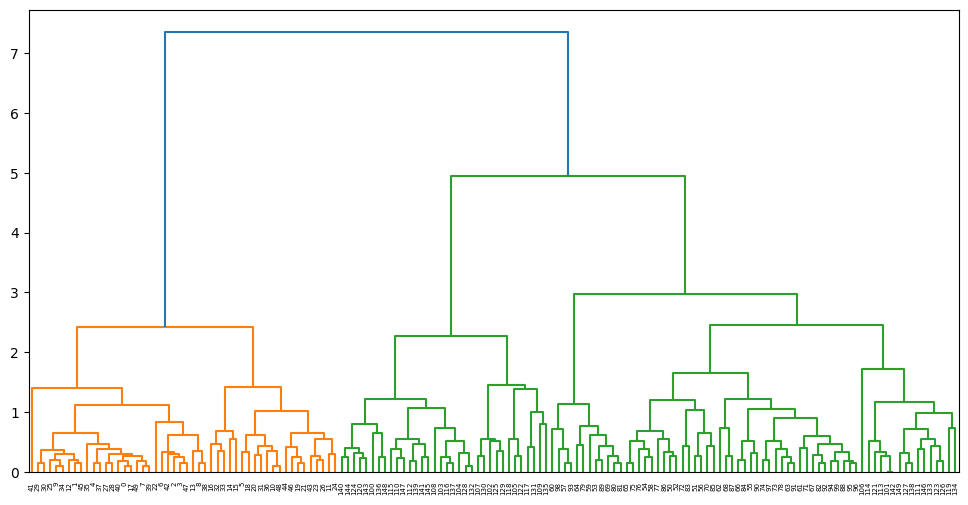

In [2]:
# 4. 덴드로그램 시각화
plt.figure(figsize=(12, 6)) # 그래프 크기 지정
# dendrogram 함수를 이용해 그래프를 그림
# x축의 레이블은 데이터의 인덱스로 설정
dendrogram(cluster_model, labels=iris.index)
plt.show() # 그래프 출력

- **코드 해설**: 덴드로그램의 y축은 클러스터 간 거리, x축은 개별 데이터를 나타냄. 이 그래프를 보고 어디서 '자르면' 가장 적절한 군집 수가 될지 시각적으로 판단할 수 있음. 예를 들어, y=4 지점에 수평선을 그으면 총 3개의 그룹으로 나뉨.

### 3단계: 특정 군집 수로 데이터 분할하기

In [3]:
# 5. fcluster() 함수로 군집 할당
# cluster_model에 대해, 거리(distance) 4를 기준으로 클러스터링을 멈추고 군집을 나눔
predict = fcluster(cluster_model, 4, criterion='distance')

# 예측된 군집 결과 확인 (일부)
print(predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


- **코드 해설**: **`fcluster()`** 함수는 `linkage()` 결과물과 기준값을 받아, 각 데이터 포인트가 어느 군집에 속하는지를 배열 형태로 반환함.

### 4단계: 결과 평가 및 시각화

Predicted   setosa  versicolor  virginica  All
True                                          
setosa          50           0          0   50
versicolor       0          50          0   50
virginica        0          16         34   50
All             50          66         34  150


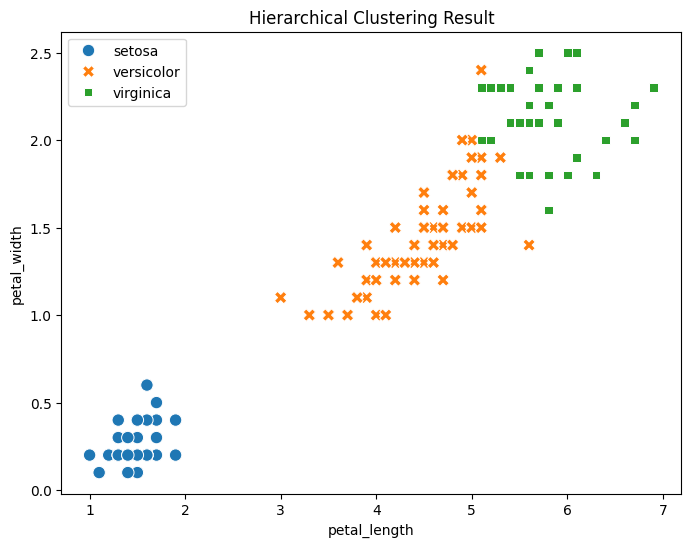

In [4]:
# 6. 결과 평가를 위한 교차표(Crosstab) 생성
# fcluster 결과가 1, 2, 3으로 나왔는데, 원래 라벨은 0, 1, 2 임.
# 비교를 위해 예측된 클러스터 번호를 조정. 1->0, 3->2, 2->1 로 매핑
adjusted_pred = np.choose((predict-1), [0, 2, 1])

# 인코딩된 숫자 라벨을 다시 원래 문자열(setosa, versicolor, virginica)로 변환
pred_name = le.inverse_transform(adjusted_pred) # 예측값 변환

# 교차 분류표 생성하여 실제값과 예측값 비교
# 행(index)은 실제 품종, 열(columns)은 예측된 품종
ct = pd.crosstab(original_species, pred_name,
            rownames=["True"], colnames=["Predicted"], margins=True)

print(ct)

# 7. 클러스터링 결과 산점도 시각화
plt.figure(figsize=(8, 6))
# petal_length와 petal_width를 x, y축으로, 예측된 군집(pred_name)을 색상(hue)과 모양(style)으로 표현
sns.scatterplot(x="petal_length", y="petal_width", data=iris,
                hue=pred_name, style=pred_name, s=80)
plt.title("Hierarchical Clustering Result")
plt.show()

- **코드 해설**: 교차표를 통해 `setosa`와 `versicolor`는 완벽히 군집화되었으나, `virginica` 중 16개가 `versicolor`로 잘못 분류되었음을 알 수 있음. 산점도는 이 오분류가 두 품종이 겹치는 영역에서 발생했음을 직관적으로 보여줌.

-----

## 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: 그룹 수를 미리 알 수 없는 **시장 세분화** 등에 유용함. **덴드로그램**은 그룹 간 계층 구조를 시각적으로 보여주어 의사결정의 강력한 근거를 제공함.
  - **기술 관점**: **K-Means와 달리 군집 수를 사전에 지정할 필요가 없음**. 어떤 \*\*`linkage method`\*\*를 선택하느냐에 따라 결과가 달라지므로 데이터 특성에 맞는 방식 선택이 중요함.
  - **해석 관점**: 덴드로그램에서 y축의 **긴 수직선**은 매우 다른 두 군집이 합쳐졌음을 의미하므로, 이 긴 선이 나타나기 직전이 최적의 군집 수를 찾는 좋은 지표가 될 수 있음.

-----

## 2\. DBSCAN 클러스터링

  - **기존 클러스터링의 한계**: K-Means나 계층적 클러스터링은 데이터가 '구형(spherical)'에 가까울 때 잘 작동하지만, 초승달이나 도넛 모양 등 복잡한 형태의 군집이나 \*\*이상치(outlier)\*\*가 섞인 경우 성능이 저하됨.
  - **`DBSCAN(Density-based spatial clustering of applications with noise)`**: '밀도(density)' 기반 접근으로 이 문제들을 해결.
  - **장점**: 데이터가 빽빽하게 모여 있는 지역을 하나의 군집으로 묶고, 어느 그룹에도 속하지 않는 데이터들을 \*\*'노이즈'\*\*로 명확하게 구분해냄. 복잡한 형태의 군집 발견과 이상치 탐지에 매우 효과적임.

-----

## 핵심 원리 파헤치기 (Deep Dive)

  - DBSCAN은 두 가지 핵심 파라미터로 동작함: \*\*`eps`\*\*와 **`min_samples`**.

      - **`eps (epsilon)`**: 하나의 데이터 포인트로부터 이웃을 찾기 위한 반경(거리).
      - **`min_samples`**: 하나의 군집으로 인정받기 위해 `eps` 반경 내에 존재해야 하는 최소 데이터 포인트의 수.

  - **데이터 포인트의 3가지 종류**

      - **핵심 포인트(Core Point)**: `eps` 반경 내에 `min_samples` 이상의 이웃을 가진 포인트. 군집의 '중심부'를 형성.
      - **경계 포인트(Border Point)**: `eps` 반경 내 이웃 수는 `min_samples`보다 적지만, '핵심 포인트'의 이웃에 속하는 포인트. 군집의 '가장자리'를 형성.
      - **노이즈(Noise)**: 핵심 포인트도, 경계 포인트도 아닌, 외부에 떨어진 포인트. 어떤 군집에도 속하지 않음.

  - **'별자리 찾기' 비유**: `eps`는 '가까워 보이는 거리', `min_samples`는 '별자리가 되기 위한 최소 별의 개수'. 충분한 이웃을 가진 별은 '핵심 별'이 되고, 이 별과 가까운 별들이 모여 별자리를 이룸. 어느 별자리에도 끼지 못하는 외로운 별은 '노이즈'가 됨.

-----

## 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1단계: K-Means가 실패하는 데이터 생성

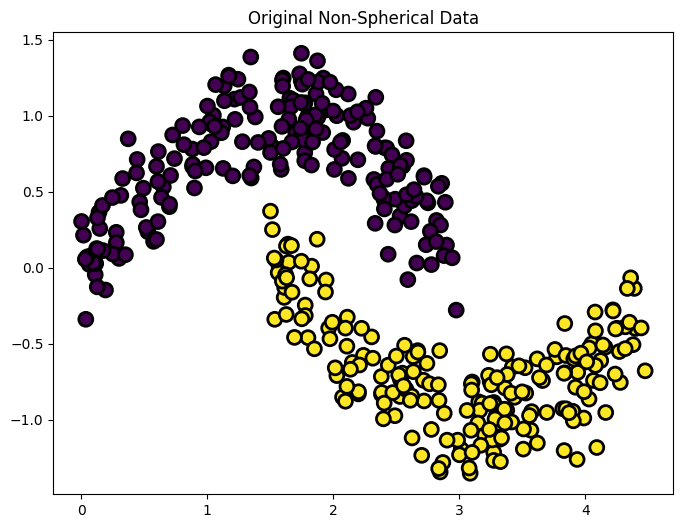

In [9]:
# 1. 초승달 모양 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

# sin, cos 함수와 노이즈를 이용해 두 개의 그룹 생성
X1 = np.random.rand(200) * 3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise
X2 = X1 + 1.5
Y2 = np.cos(X2) + noise

# 두 그룹을 하나로 합침
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)] # group1 데이터와 레이블(0) 결합
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)] # group2 데이터와 레이블(1) 결합
data = np.r_[group1, group2] # group1과 group2를 행 기준으로 합침

# 생성된 데이터 시각화
plt.figure(figsize=(8, 6))
# 데이터의 x(data[:,0]), y(data[:,1]) 좌표를 사용하여 산점도 생성
# 색상(c)은 정답 레이블(data[:,2])로 구분
plt.scatter(x=data[:,0], y=data[:,1],
            marker='o', c=data[:,2].astype(np.int64),
            s=100, edgecolor='k', linewidth=2)
plt.title("Original Non-Spherical Data")
plt.show() # 그래프 출력

### 2단계: DBSCAN 모델 학습 및 결과 시각화

Estimated number of clusters: 2
Estimated number of noise points: 0


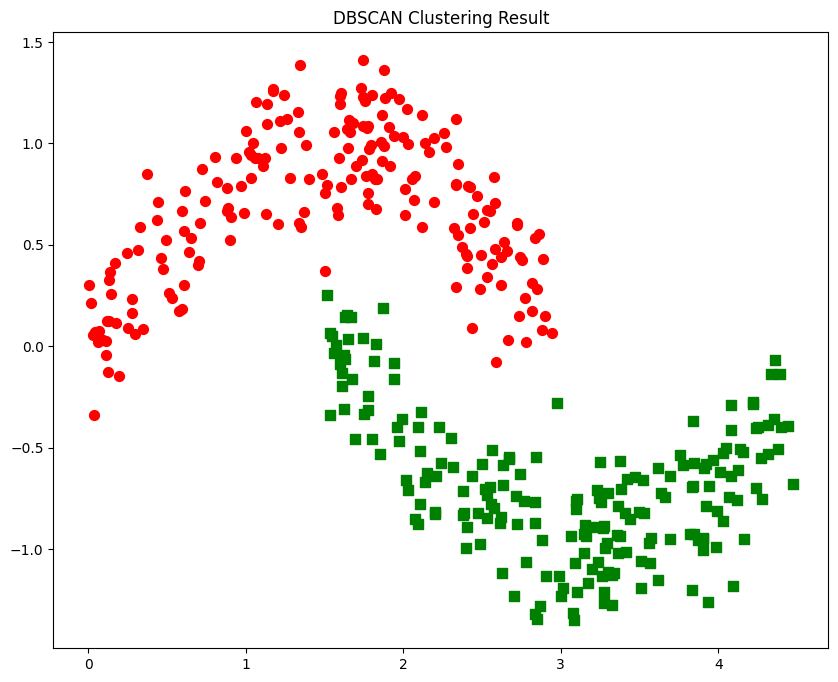

In [10]:
# 2. DBSCAN 모델 생성 및 학습
from sklearn.cluster import DBSCAN

# eps=0.3, min_samples=10으로 DBSCAN 모델 생성 및 학습
db = DBSCAN(eps=0.3, min_samples=10) # eps는 이웃을 찾을 반경, min_samples는 군집 최소 샘플 수
db.fit(data[:,0:2]) # 정답 레이블을 제외한 x, y 좌표만으로 학습

# 3. 클러스터링 결과 분석
labels = db.labels_ # 각 데이터 포인트에 할당된 클러스터 라벨 (-1은 노이즈)

# 노이즈(-1)를 제외한 클러스터의 개수 계산
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# 노이즈 포인트의 개수 계산
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# 4. 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y', 'c', 'm'] # 클러스터별 색상
markers = ['o', 's', '^', 'v', '<', '>'] # 클러스터별 마커

# 각 클러스터별로 다른 색상과 마커로 산점도 그리기
for i in range(n_clusters_):
    # i번째 클러스터에 속하는 데이터만 필터링하여 그리기
    plt.scatter(x=data[db.labels_ == i, 0], y=data[db.labels_ == i, 1],
                s=50, marker=markers[i], c=colors[i])

# 노이즈 포인트는 파란색 'x' 마커로 별도 표시
plt.scatter(x=data[db.labels_ == -1, 0], y=data[db.labels_ == -1, 1],
            s=50, marker='x', c='b') # -1 라벨은 노이즈를 의미

plt.title("DBSCAN Clustering Result")
plt.show()

- **코드 해설**: **`DBSCAN`** 모델을 `eps=0.3`, `min_samples=10`으로 학습함. 결과 라벨에서 **-1은 노이즈**를 의미함. 시각화 결과, 복잡한 초승달 모양의 두 군집을 성공적으로 찾아냈고, 두 군집 사이의 애매한 포인트들을 '노이즈'로 정확히 식별했음을 확인할 수 있음.

-----

## 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: **이상 데이터 탐지**(금융 사기, 불량품 검출)에 매우 효과적임. GIS 시스템에서 상권이나 인구 밀집 지역 파악에도 널리 사용됨.
  - **기술 관점**: **군집 수를 미리 지정할 필요 없고**, 기하학적으로 복잡한 모양의 군집도 잘 찾아냄. **이상치(노이즈)를 자동으로 탐지**하고 분리함.
  - **해석 관점**: 결과가 \*\*`eps`\*\*와 **`min_samples`** 파라미터에 민감하므로, 데이터 특성에 맞는 최적의 파라미터를 찾는 과정(튜닝)이 매우 중요함.